In [12]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(0, ".")

# Plotting preferences
from matplotlib import rcParams

rcParams.update({"figure.figsize": (12, 6)})
bin_width = 0.9
alpha = 0.5
transparent = False
bbox_inches = "tight"
facecolor = "white"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arrow

def parse_index_as_datetime(df, year):
    # Parse index as datetimes
    if type(df.index) != pd.core.indexes.datetimes.DatetimeIndex:
        df.index = [arrow.get(str(year) + ' ' + d, 'YYYY ddd MMM DD, H A').datetime for d in df.index]
    return df

# Load data

# Donwload CARMA database here: https://www.cgdev.org/sites/default/files/CARMAv30_PowerUser.zip
df_capability = pd.read_csv("../data/capability.csv", thousands=',')
df_plants = pd.read_csv("../data/plants.csv")
df_output = pd.read_csv("../data/output.csv", index_col=0, thousands=',')

df_summary = pd.read_csv("../data/summary.csv", index_col=0, thousands=',')
df_summary = parse_index_as_datetime(df_summary, 2021)
percentage_cols = [col for col in df_summary.columns if col.endswith('Percentage')]
for col in df_summary[percentage_cols]:
    df_summary[col] = df_summary[col].str.replace("%", "").astype(float)
    
output_cols = [col for col in df_summary.columns if col.endswith('Output')]
for col in df_summary[output_cols]:
    df_summary[col] = df_summary[col].str.replace(" MW", "")
    df_summary[col] = df_summary[col].str.replace(",", "").astype(float)

df_summary['ONTARIO DEMAND'] = df_summary['ONTARIO DEMAND'].str.replace(" MW", "")
df_summary['ONTARIO DEMAND'] = df_summary['ONTARIO DEMAND'].str.replace(",", "").astype(float)
df_summary['CO2e INTENSITY'] = df_summary['CO2e INTENSITY'].str.replace(" g/kWh", "").astype(float)

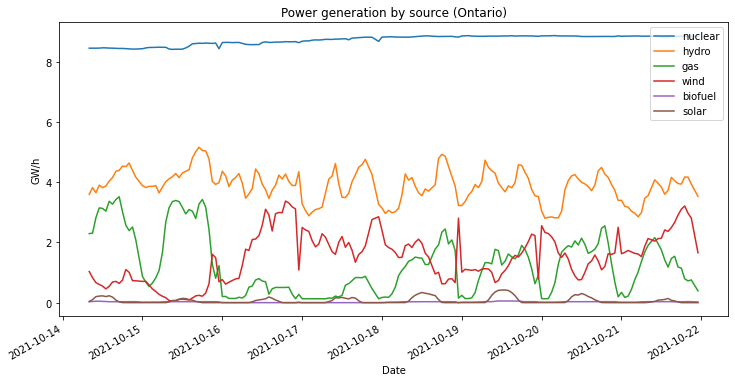

In [20]:
(df_summary[output_cols] / 1e3).plot()
plt.ylabel('GW/h')
plt.xlabel('Date')
plt.title('Power generation by source (Ontario)')
plt.legend([col.replace('Output', '') for col in output_cols])
plt.savefig(
    os.path.join("images", "power_generation_by_source.png"),
    bbox_inches=bbox_inches,
    transparent=transparent,
    facecolor=facecolor,
)

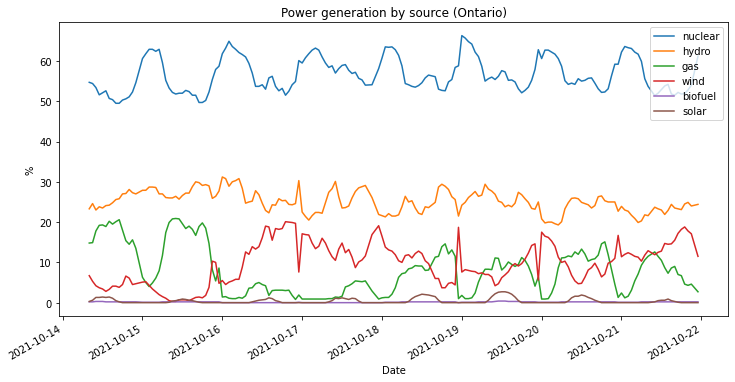

In [17]:
df_summary[percentage_cols].plot()
plt.ylabel('%')
plt.xlabel('Date')
plt.title('Power generation by source (Ontario)')
plt.legend([col.replace('Percentage', '') for col in percentage_cols])
plt.savefig(
    os.path.join("images", "power_generation_by_source_percentage.png"),
    bbox_inches=bbox_inches,
    transparent=transparent,
    facecolor=facecolor,
)

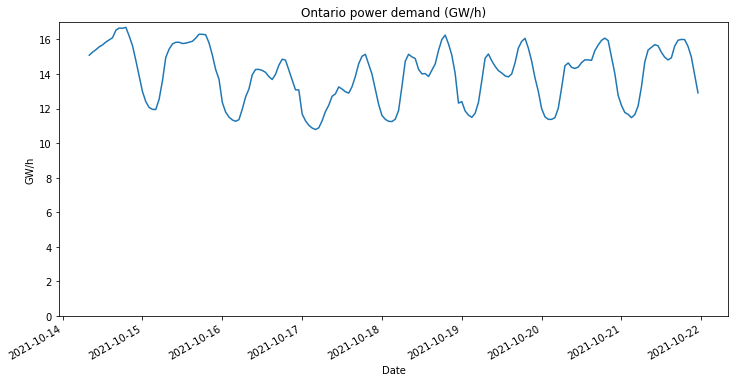

In [18]:
(df_summary['ONTARIO DEMAND'] / 1e3).plot()
plt.ylabel('GW/h')
plt.xlabel('Date')
plt.ylim([0, None])
plt.title('Ontario power demand (GW/h)')
plt.savefig(
    os.path.join("images", "power_demand.png"),
    bbox_inches=bbox_inches,
    transparent=transparent,
    facecolor=facecolor,
)

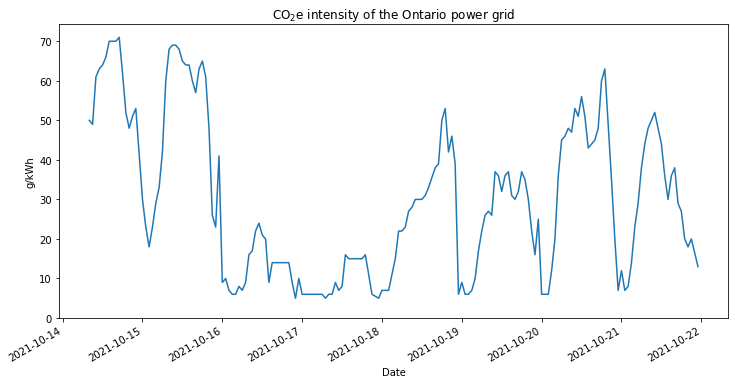

In [19]:
df_summary['CO2e INTENSITY'].plot()
plt.ylabel('g/kWh')
plt.xlabel('Date')
plt.ylim([0, None])
plt.title('CO$_2$e intensity of the Ontario power grid')
plt.savefig(
    os.path.join("images", "co2_intensity.png"),
    bbox_inches=bbox_inches,
    transparent=transparent,
    facecolor=facecolor,
)